# 日本地図を可視化する 

日本地図を可視化する方法はいくつかあるが 、今回はpythonのパッケージで  
その名の通り、japanmap を使用する例を紹介します。


#### インストール

japanmap をインストールする。通常のpythonパッケージと同様にpipコマンドでインストールします。

```pip install japanmap ```

#### 基1本的な使用法です

In [33]:
from japanmap import pref_names,pref_code,picture

```pref_code``` 　関数には都道府県名を与えると、都道府県コードが返されます。

In [32]:
print(pref_code('北海道'))

1


```pref_name``` が都道府県名が格納されているリストになります。  
都道府県コードはリストのインデックスと同じです。

In [ ]:
pref_names

#### 地図表示

In [ ]:
picure()関数で画像データが返されるのでmatplotlibで表示します。
白地図の表示は以下のようになります。  

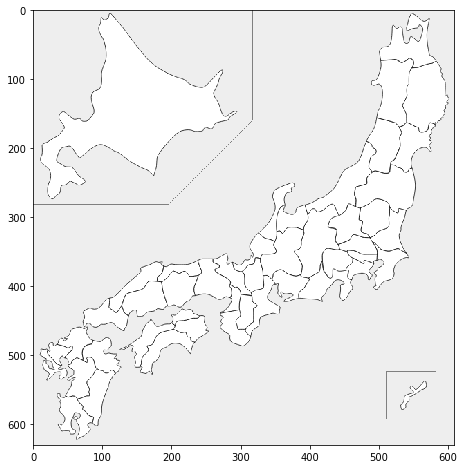

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 8,8
plt.imshow(picture());


塗りつぶすには、都道府県名と色を指定した辞書のデータを  
picture関数へ渡せば大丈夫です。  
色の指定は、色名の文字列または、RGB指定になります。

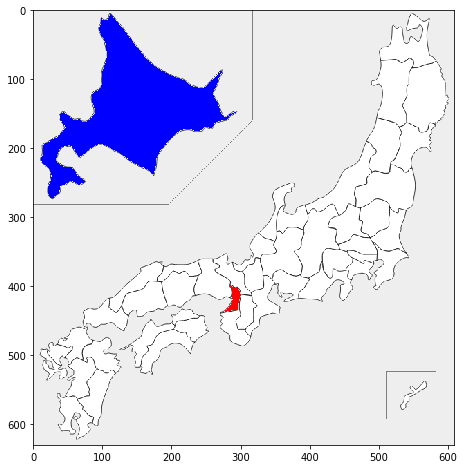

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 8,8
plt.imshow(picture({'北海道':'blue','大阪府':(255,0,0)}));


#### ITエンジニアの有効求人倍率のデータを可視化する

pythonで2018年8月現在のデータを使用して、ITエンジニアの有効求人倍率を  
都道府県別に可視化してみます。  

使用するデータは、RESAS（地域経済分析システム）からダウンロードしたものを使用します。

詳しくはこちら
[RESAS](https://resas.go.jp)


In [98]:
import pandas as pd
import numpy as np


df = pd.read_csv("医療・福祉マップ_有効求人倍率_都道府県_職業中分類.csv",encoding='shift-jis') #ファイル名て適宜変更してください
df = df.loc[ (df['職業大分類コード'] == 'B') &   (df['職業中分類コード'] == 10 ) & (df['集計年']==2017) & (df['集計月']==8 ) ]
perf_list = df.iloc[:,3].values
rate = df.iloc[:,10].values
rf = rate.astype(np.float32)


In [119]:
def color_scale(r):
    return (0, int(255 - 255/np.max(rf) * r), 255)

data ={}
for p,r in zip(perf_list, rf):
    c = color_scale(r)
    data[p] = c


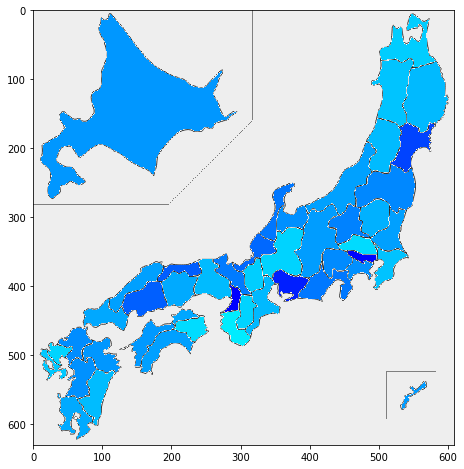

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 8,8
plt.imshow(picture(data));


濃い青色が有効求人倍率が1倍以上の都道府県です。やはりITエンジニアの求人数は  
地図の見て通り、3大都市圏（東京、愛知、大阪）に集中しているのが良く分かります。   
水色はITエンジアの求人が少ない場所は地方に偏っています。  
地方再生の鍵は、ITエンジニアが地方でも活躍できるようになれば良いのではないでしょうか。
